Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

When a (n,k) and (k,n) matrix are multiplied, the number of:

1) Multiplications= n * k * m.

Explanation: In the resulting matrix, there are n * m elements, each of which is the sum of 'k' products. So, there are a total of n * m * k multiplications.

2) Additions= n * (k-1) * m.

Explanation: In the product matrix, there are n * m elements, each a sum of 'k' products, and hence each element would contain 'k-1' additions. So, there are n * (k-1) * m additions.

In [ ]:
# Q2) list of lists

import random

def list_of_lists(A,B):
  k= len(A[0])
  n= len(A)
  m= len(B[0])
  pdt= [[0 for x in range(m)] for y in range(n)]

  for i in range(n):
    for j in range(m):
      for l in range(k):
        pdt[i][j]+= A[i][l]* B[l][j]

  return pdt


A = [[15,7,4],
        [4 ,15,6],
        [7 ,23,9]]
B = [[5,8,1],
        [6,16,3],
        [19,5,9]]

pdt= print(list_of_lists(A,B))

[[193, 252, 72], [224, 302, 103], [344, 469, 157]]


In [ ]:
# Q2) Using numpy
import numpy as np

def pdt_np(A,B):
  return np.dot(np.array(A), np.array(B))

A = [[15,7,4],
        [4 ,15,6],
        [7 ,23,9]]
B = [[5,8,1],
        [6,16,3],
        [19,5,9]]


print(pdt_np(A,B))

[[193 252  72]
 [224 302 103]
 [344 469 157]]


In [ ]:
# Q2) comparing time of both
import time
import numpy as np

start= time.time()
for i in range(1,10000):
    pdt_np(A,B)
end_numpy= time.time()

for i in range(1,10000):
    list_of_lists(A,B)
end_lists= time.time()

print(pdt_np(A,B))
print()
print(list_of_lists(A,B))
print()
print("Time using the numpy method= ",end_numpy-start)
print("Time using the list of lists method= ",end_lists-end_numpy)


[[193 252  72]
 [224 302 103]
 [344 469 157]]

[[193, 252, 72], [224, 302, 103], [344, 469, 157]]

Time using the numpy method=  0.10685610771179199
Time using the list of lists method=  0.17152166366577148


In [ ]:
#Q3)
import numpy as np

def firstmethod(A):
  sorted_arr=sorted(A)
  mid=len(A)//2
  if len(sorted_arr)%2==1:
    return(sorted_arr[mid])
  else:
    return((sorted_arr[mid-1]+sorted_arr[mid])/2)

# The better method to finding the median would be to use quickselect
def partition(A, start, end):
    pivot = A[start]
    i, j = start + 1, end
    while i <= j:
        if A[i] < pivot:
            i += 1
        elif A[j] > pivot:
            j -= 1
        else:
            A[i], A[j] = A[j], A[i]
            i += 1
            j -= 1
    A[start], A[j] = A[j], A[start]
    return j

def quickselect(A, start, end, k):
    while start<= end:
        pivot_index= partition(A, start, end)
        if k== pivot_index:
            return A[k]
        elif k< pivot_index:
            end= pivot_index - 1
        else:
            start= pivot_index + 1
            k-= (pivot_index - start + 1)
    return A[start]


def median(A):
    n= len(A)
    if n%2== 1:
        return quickselect(A, 0, n-1, n//2)
    else:
        mid1= quickselect(A, 0, n-1, (n//2) - 1)
        mid2= quickselect(A, 0, n-1, n//2)
        return (mid1+mid2)/2



# Finding the median using the numpy method
def numpy_method(A):
  return np.median(A)


A=[3,8,14,9,2,17,6,12]
print("Median by the first method=  ",firstmethod(A))
print("Median by using quickselect= ", median(A))
print("Median by numpy method=  ",numpy_method(A))

Median by the first method=   8.5
Median by using quickselect=  8.5
Median by numpy method=   8.5


Q3)
The time complexity using the first method, in which we pass through the whole array as many times as required to find the median is = O(nlog(n))

Q4)
Solved it on paper, wasn't able to use latex. Picture not uploading due to glitch. Wrote down the solution in words below:

x- coordinate of gradient= 2xy + y^3 cosx. (partial derivative of the function w.r.t x)

y- coordinate of gradient= x^2 + 3y^2 sinx (partial derivative of the function w.r.t y)

gradient= (2xy + y^3 cosx,x^2 + 3y^2 sinx)

In [ ]:
# Q5)

import jax
import jax.numpy as jnp

def f(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x)

a1=1.0
b1=2.0

jax_grad1 = jax.grad(f, argnums=(0,1))(a1, b1)
analy_grad1= (2*a1*b1+b1**3*jnp.cos(a1),a1**2+3*b1**2*jnp.sin(a1))

print(jax_grad1 )
print(analy_grad1)

a2=4.0
b2=5.0

jax_grad2 = jax.grad(f, argnums=(0,1))(a2, b2)
analy_grad2= (2*a2*b2+b2**3*jnp.cos(a2),a2**2+3*b2**2*jnp.sin(a2))

print(jax_grad2 )
print(analy_grad2)


(Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
(Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
(Array(-41.705452, dtype=float32, weak_type=True), Array(-40.76019, dtype=float32, weak_type=True))
(Array(-41.705452, dtype=float32, weak_type=True), Array(-40.76019, dtype=float32, weak_type=True))


In [ ]:
# Q6)
import sympy as sp

x,y=sp.symbols('x y')
func=(x**2)*y + (y**3)*sp.sin(x)

gradx=sp.diff(func,x)
grady=sp.diff(func,y)

print(f"Gradient x: {gradx}")
print(f"Gradient y: {grady}")




Gradient x: 2*x*y + y**3*cos(x)
Gradient y: x**2 + 3*y**2*sin(x)


In [ ]:
# Q7)
import pandas as pd

data= {2022:
       {"Branch 1":
        {1:{"Roll number": 1, "Name": "Monisha", "Marks": {"Maths": 97, "English": 98, "Science": 95}},
         2:{"Roll number": 2, "Name" : "Ananya", "Marks": {"Maths": 87, "English": 94, "Science": 92}}},
        "Branch 2":
        {1:{"Roll number": 3, "Name": "Rachit", "Marks": {"Maths": 84, "English": 87, "Science": 94}},
         2:{"Roll number": 4, "Name" : "Aditi", "Marks": {"Maths": 95, "English": 93, "Science": 87}}},
        },

       2023:
       {"Branch 1":
        {1:{"Roll number": 5, "Name": "Ram", "Marks": {"Maths": 95, "English": 99, "Science": 85}},
         2:{"Roll number": 6, "Name" : "Angel", "Marks": {"Maths": 77, "English": 84, "Science": 72}}},
        "Branch 2":
        {1:{"Roll number": 7, "Name": "Vijay", "Marks": {"Maths": 90, "English": 97, "Science": 96}},
         2:{"Roll number": 8, "Name" : "Sam", "Marks": {"Maths": 100, "English": 89, "Science": 84}}},
        },

       2024:
       {"Branch 1":
        {1:{"Roll number": 9, "Name": "Prateek", "Marks": {"Maths": 38, "English": 86, "Science": 56}},
         2:{"Roll number": 10, "Name" : "Rohan", "Marks": {"Maths": 47, "English": 94, "Science": 68}}},
        "Branch 2":
        {1:{"Roll number": 11, "Name": "Taylor", "Marks": {"Maths": 84, "English": 87, "Science": 91}},
         2:{"Roll number": 12, "Name" : "Max", "Marks": {"Maths": 95, "English": 92, "Science": 99}}},
        },

       2025:
       {"Branch 1":
        {1:{"Roll number": 13, "Name": "Tanishka", "Marks": {"Maths": 95, "English": 91, "Science": 87}},
         2:{"Roll number": 14, "Name" : "Madison", "Marks": {"Maths": 46, "English": 84, "Science": 74}}},
        "Branch 2":
        {1:{"Roll number": 15, "Name": "Kamala", "Marks": {"Maths": 100, "English": 97, "Science": 67}},
         2:{"Roll number": 16, "Name" : "Devi", "Marks": {"Maths": 91, "English": 83, "Science": 35}}},
        },

       }



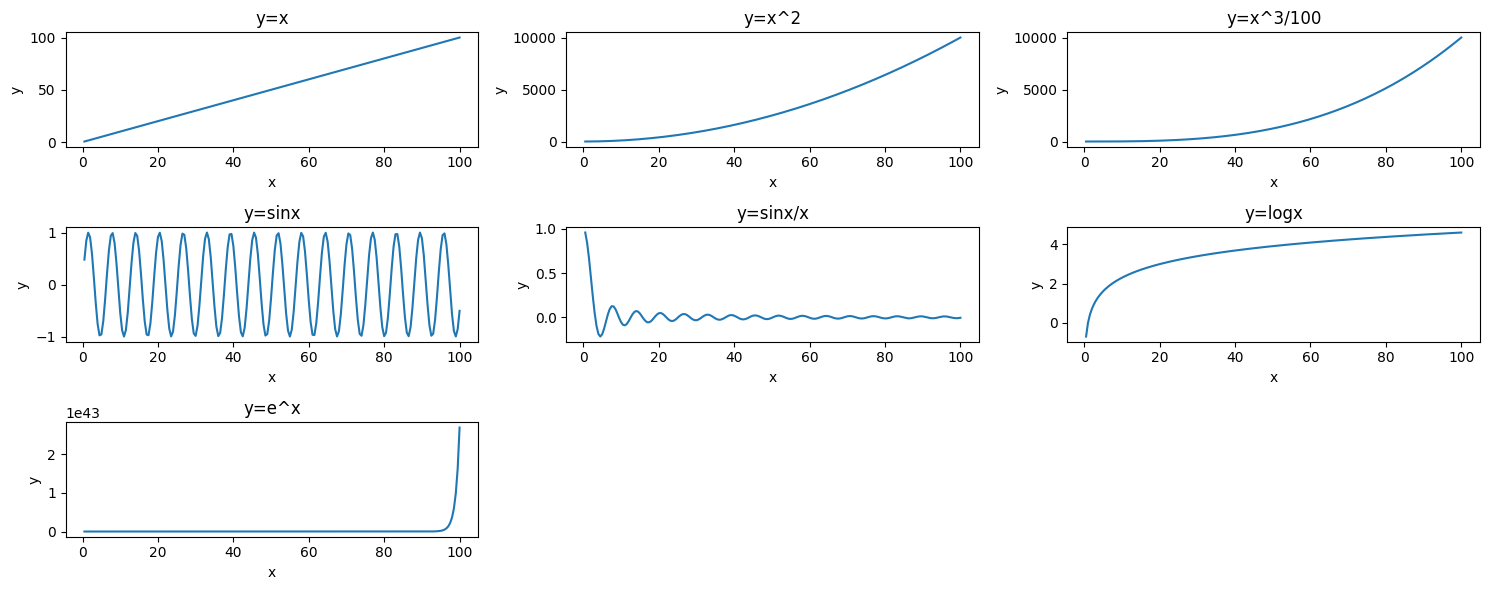

In [ ]:
# Q9)
import numpy as np
import matplotlib.pyplot as plt
import math

x= np.arange(0.5, 100.5, 0.5)
y1=x
y2= x**2
y3= x**3/100
y4= np.sin(x)
y5= np.sin(x)/x
y6= np.log(x)
y7= np.exp(x)

fig, axes= plt.subplots(3,3, figsize=(15,6))

axes[0,0].plot(x,y1)
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].set_title('y=x')

axes[0,1].plot(x,y2)
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,1].set_title('y=x^2')

axes[0,2].plot(x,y3)
axes[0,2].set_xlabel('x')
axes[0,2].set_ylabel('y')
axes[0,2].set_title('y=x^3/100')

axes[1,0].plot(x,y4)
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('y')
axes[1,0].set_title('y=sinx')

axes[1,1].plot(x,y5)
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('y')
axes[1,1].set_title('y=sinx/x')

axes[1,2].plot(x,y6)
axes[1,2].set_xlabel('x')
axes[1,2].set_ylabel('y')
axes[1,2].set_title('y=logx')

axes[2,0].plot(x,y7)
axes[2,0].set_xlabel('x')
axes[2,0].set_ylabel('y')
axes[2,0].set_title('y=e^x')

axes[2,1].axis("off")
axes[2,2].axis("off")

plt.tight_layout()

In [ ]:
# Q10)
import numpy as np
import pandas as pd

A= np.random.uniform(1,2,(20,5))

data=pd.DataFrame(A,columns=['a','b','c','d','e'])

standard_deviation=data.std()
max_std=standard_deviation.idxmax()

mean_of_row =data.mean(axis=1)
min_mean =mean_of_row.idxmin()

print("The column with the highest standard deviation= ",max_std)
print("The row with the lowest mean= ",min_mean)

The column with the highest standard deviation=  a
The row with the lowest mean=  15


In [ ]:
# Q11)
# column f
data['f']= data['a']+data['b']+data['c']+data['d']+data['e']

#column g
data['g']= np.where(data['f']<8, "LT8", "GT8")
rows_with_LT8= (data['g']=="LT8").sum()

std_for_LT8= (data[data['g']=="LT8"]['f']).std()
std_for_GT8= (data[data['g']=="GT8"]['f']).std()


print("The number of rows which have the value 'LT8' in the column g= ", rows_with_LT8)
print(f"Standard deviation of the rows which have LT8 and GT8 in the column 'g' is {std_for_LT8} and {std_for_GT8} respectively")

The number of rows which have the value 'LT8' in the column g=  14
Standard deviation of the rows which have LT8 and GT8 in the column 'g' is 0.5492027897985333 and 0.08368585447724508 respectively


In [ ]:
# Q12)
import numpy as np

A= np.array([[6, 11, 14],
             [28, 36, 1],
             [23, 3, 5]])
B= np.array([1, 4, 7])

C= A+B
print(f"Sum of A and B (broadcasted)= {C}")

Sum of A and B (broadcasted)= [[ 7 15 21]
 [29 40  8]
 [24  7 12]]


In [ ]:
# Q13)
import numpy as np

def min_of_array(A):
  min=A[0]
  index=0
  for i in range(len(A)):
    if A[i]< min:
      min= A[i]
      index=i
  return index

A= np.array([18, 56, 227, 14, 26, 8])
print(min_of_array(A))
print(np.argmin(A))

5
5
